### Notebook model

In [34]:
# Import des librairies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from PIL import Image
# preprocessing 
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Rescaling

# hyperparameters
from functools import partial 

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D

# warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# import des données
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv") # données sans target, non labelisées

In [3]:
df.shape

(42000, 785)

In [4]:
df_test.shape

(28000, 784)

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
len(df.label.unique())

10

In [7]:
# séparer les features de la target
X = df.drop(["label"], axis = 1)
y = df["label"]

# train test split 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [8]:
X_train.shape

(33600, 784)

In [9]:
X_valid.shape

(8400, 784)

In [10]:
X_train_arr = X_train.values.reshape(33600, 28, 28, 1)
X_valid_arr = X_valid.values.reshape(8400, 28, 28, 1)

In [11]:
# preprocessing
X_train = Rescaling(scale=1 / 255)(X_train)
X_valid = Rescaling(scale=1 / 255)(X_valid)

In [12]:
input_shape = (28, 28, 1)

In [13]:
# model CNN
DefaultConv2D = partial(Conv2D, kernel_size=3, padding="same", activation="relu", 
                        kernel_initializer="he_normal")

model = Sequential([
    DefaultConv2D(filters=32, kernel_size=7, input_shape=(28, 28, 1)),
    MaxPool2D(),
    DefaultConv2D(filters=64),
    MaxPool2D(),
    DefaultConv2D(filters=128),
    MaxPool2D(),
    Flatten(),
    Dense(units=128, activation="relu", kernel_initializer="he_normal"),
    Dense(units=64, activation="relu", kernel_initializer="he_normal"),
    Dense(units=10, activation="softmax")
])


model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(
    X_train_arr, y_train,
    validation_data=(X_valid_arr, y_valid),
    batch_size=512,
    epochs=4,
    verbose=0,
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        1600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

Accuracy: 0.9330


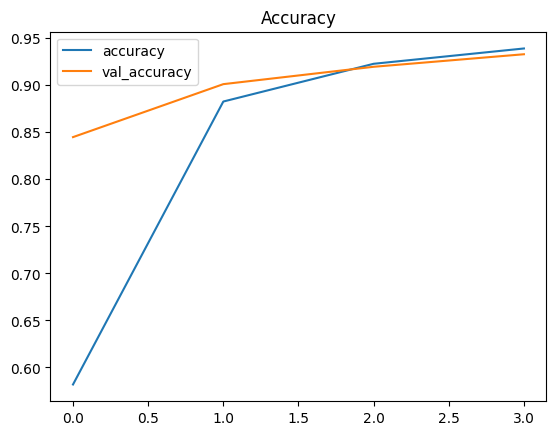

In [14]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")
print("Accuracy: {:0.4f}".format(history_df['val_accuracy'].max()))

In [15]:
# exporter le modèle en pickle 
import pickle

# Enregistrer le modèle en utilisant la fonction pickle.dump()
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)
    f.close()

In [16]:
row_test = df_test.sample(1)
arr = row_test.values.reshape(28, 28)

In [26]:
row_test = df_test.sample(1)

In [27]:
arr = row_test.values.reshape(28, 28)

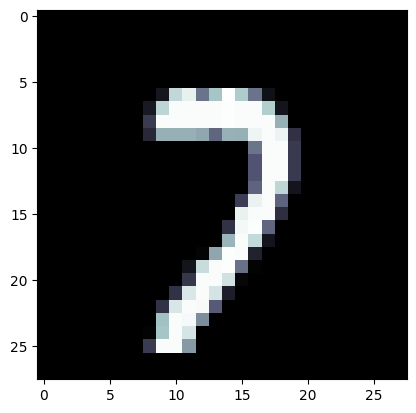

In [28]:
plt.imshow(arr,cmap="bone")
plt.show()

In [29]:
    pred = model.predict(row_test.values.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 23ms/step


In [30]:
pred

array([[2.2069412e-22, 1.2085501e-18, 3.4297942e-04, 2.8153213e-15,
        1.7915927e-27, 0.0000000e+00, 0.0000000e+00, 9.9965703e-01,
        1.2497223e-27, 2.7754786e-33]], dtype=float32)

In [31]:
print(pred.argmax())

7


In [32]:
pred.argmax()

7